In [1]:
from __future__ import print_function

from keras.datasets import mnist
from keras.optimizers import RMSprop
from keras.utils import np_utils
from keras import objectives
from keras.callbacks import EarlyStopping
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
batch_size = 128
nb_classes = 10

In [3]:
# load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')
X_train /= 255.0
X_test /= 255.0

# convert class vectors to 1-of-K format
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

In [4]:
print('train samples: ', X_train.shape)
print('test samples: ', X_test.shape)

train samples:  (60000, 784)
test samples:  (10000, 784)


## Full Connected Layer

In [5]:
in_layer = Input((784,))
hidden = Dense(512, activation = 'relu')(in_layer)
hidden = Dense(512, activation = 'relu')(hidden)
output = Dense(10, activation = 'softmax')(hidden)

In [6]:
model = Model(input=in_layer, output=output)
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [7]:
hist = model.fit(X_train, y_train,
                 batch_size=batch_size,
                 verbose=1,
                 nb_epoch=100,
                 validation_split=0.1,
                 callbacks=[early_stopping]
                 )

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 30s - loss: 0.2362 - acc: 0.9288 - val_loss: 0.1027 - val_acc: 0.9703
Epoch 2/100
54000/54000 [==============================] - 34s - loss: 0.0846 - acc: 0.9737 - val_loss: 0.1018 - val_acc: 0.9720
Epoch 3/100
54000/54000 [==============================] - 27s - loss: 0.0565 - acc: 0.9827 - val_loss: 0.0762 - val_acc: 0.9785
Epoch 4/100
54000/54000 [==============================] - 27s - loss: 0.0399 - acc: 0.9875 - val_loss: 0.0830 - val_acc: 0.9802
Epoch 5/100
54000/54000 [==============================] - 27s - loss: 0.0297 - acc: 0.9905 - val_loss: 0.0846 - val_acc: 0.9805
Epoch 6/100
54000/54000 [==============================] - 28s - loss: 0.0236 - acc: 0.9927 - val_loss: 0.0843 - val_acc: 0.9815


In [8]:
# evaluate
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 3s     
Test loss: 0.0867657679869
Test accuracy: 0.9801


In [9]:
print (np.argmax(model.predict(X_test[:10]),axis=1))
print (np.argmax(y_test[:10],axis=1))

[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


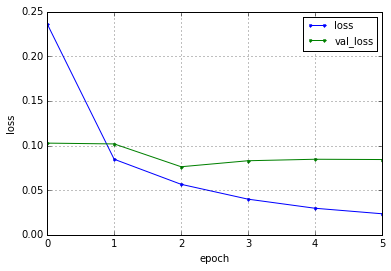

In [10]:
# plot loss
loss = hist.history['loss']
val_loss = hist.history['val_loss']

nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss, marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()